In [29]:
import pandas as pd

college = pd.read_csv('../data/College.csv')
college.columns = ['College','Private','Apps','Accept','Enroll','Top10perc','Top25perc','F.Undergrad','P.Undergrad','Outstate','Room.Board','Books','Personal','PhD','Terminal','S.F.Ratio','perc.alumni','Expend','Grad.Rate']

X = college.iloc[:, :18]
y = college.iloc[:, 18:]

X = X.drop(['College'], axis=1)
X['Private'] = X.Private.map({'Yes': 1, 'No': 0})

X.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735


In [30]:
y.describe()

,Grad.Rate
count,777.00000
mean,65.46332
std,17.17771
min,10.00000
25%,53.00000
50%,65.00000
75%,78.00000
max,118.00000


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Run models

In [39]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [40]:
def run_model(model, al_name, plot_index):
    model.fit(X_train, y_train.values.reshape(-1, ))
    y_pred = model.predict(X_test)
    
    accuracy = sqrt(mean_squared_error(y_test, y_pred))
    
#     color_code = {'low': 'red', 'medium': 'green', 'high': 'blue'}
    plot_index -= 1
    ax = axes[plot_index//3, plot_index%3]
    
#     colors_actual = [color_code[i] for i in y_test.iloc[:, 0]]
#     colors_pred = [color_code[i] for i in y_pred]
    
    ax.scatter(X_test.iloc[:, 0], y_test, color='blue', marker='.', label='Dot = Ground_truth')
    ax.scatter(X_test.iloc[:, 0], y_pred, color='red', facecolor='none', marker='o', label='Circle = Prediction')
    
    ax.legend(loc="lower right")
#     leg = plt.gca().get_legend()
#     leg.legendHandles[0].set_color('black')
#     leg.legendHandles[1].set_color('black')
#     leg.legendHandles[1].set_facecolors('none')
    
    ax.set_title(al_name + " - error = " + str(round(accuracy, 4)))


[17:44:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Trang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


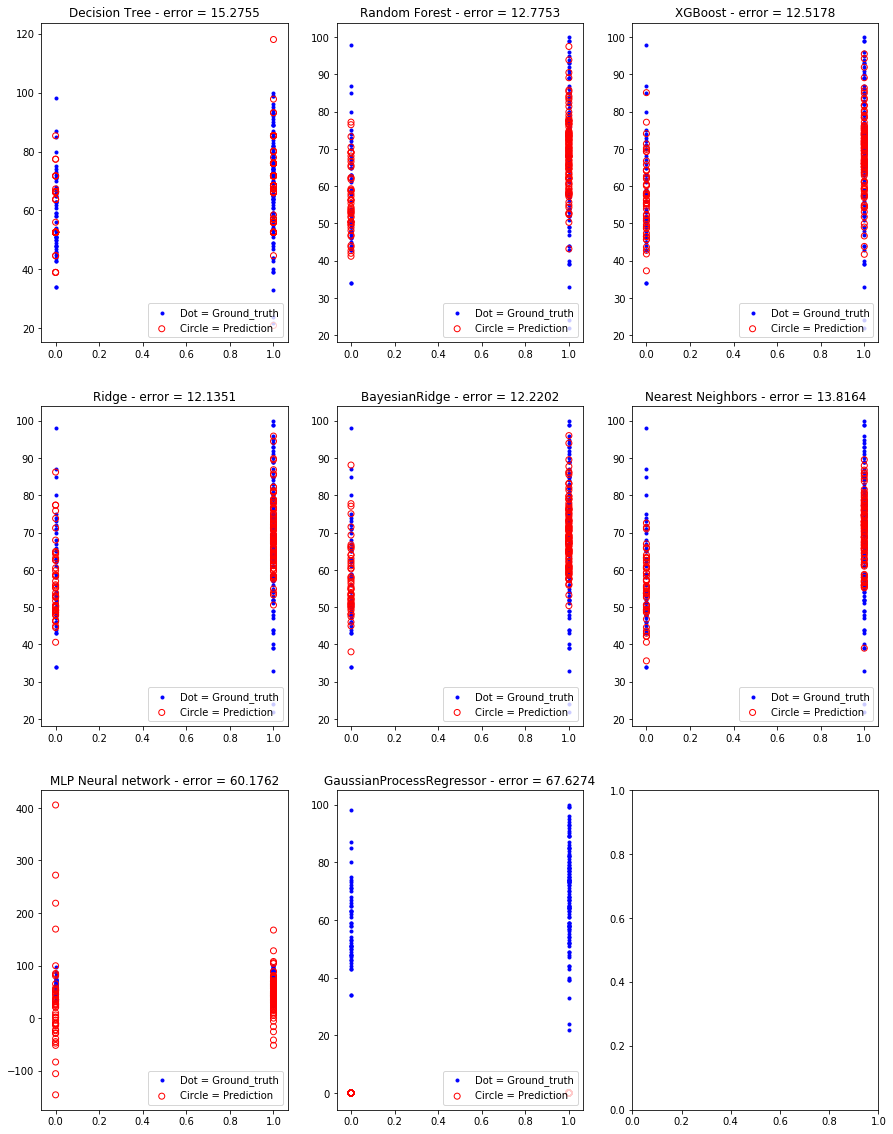

In [41]:
fig = plt.figure(figsize=(15,20))
axes = fig.subplots(nrows=3, ncols=3)

# ---- Decision Tree -----------
from sklearn import tree

model = tree.DecisionTreeRegressor(criterion='mse', max_depth=5)
run_model(model, "Decision Tree", 1)

# ----- Random Forest ---------------
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10)
run_model(model, "Random Forest", 2)

# # ----- xgboost ------------
# # install xgboost
# # 'pip install xgboost' or https://stackoverflow.com/questions/33749735/how-to-install-xgboost-package-in-python-windows-platform/39811079#39811079
from xgboost import XGBRegressor

model = XGBRegressor()
run_model(model, "XGBoost", 3)

# # ----- Ridge ------------
from sklearn.linear_model import Ridge

model = Ridge()
run_model(model, "Ridge", 4)

# # ------ BayesianRidge ----------------
from sklearn.linear_model import BayesianRidge

model = BayesianRidge()
run_model(model, "BayesianRidge", 5)

# # -------- Nearest Neighbors ----------
from sklearn import neighbors

model = neighbors.KNeighborsRegressor()
run_model(model, "Nearest Neighbors", 6)

# ----------- Neural network - Multi-layer Perceptron  ------------
from sklearn.neural_network import MLPRegressor

model = MLPRegressor()
run_model(model, "MLP Neural network", 7)

# ----------- GaussianProcessRegressor  ------------
from sklearn.gaussian_process import GaussianProcessRegressor

model = GaussianProcessRegressor()
run_model(model, "GaussianProcessRegressor", 8)